## In this notebook i will try to do all end to end ml  i mean from EDA(Exploratory Data Analysis) to Deploying the Final Trained Model

## Generally the common path of any end to end ML Project work flow is like:

1. Importing libraries
2. Loading the data
3. Data preparation
4. Splitting the features and target(i.e.,independent and dependent features)
5. Model creation
6. Training the model
7. Prediction
8. Deployment

# Aim of the project : To Predicting the Song Popularity by using a dataset from kaggle

## Summary:

####     The file is in csv format which contains 1835 rows and 15 columns.
####     This is a regression problem by help of song_ propularity we can conclude
####     The Dependent varible is song_propularity.
####     Regression is a supervised learning algorthim.
####     We  will train the model by using feature and target and predict the model output with best accuracy

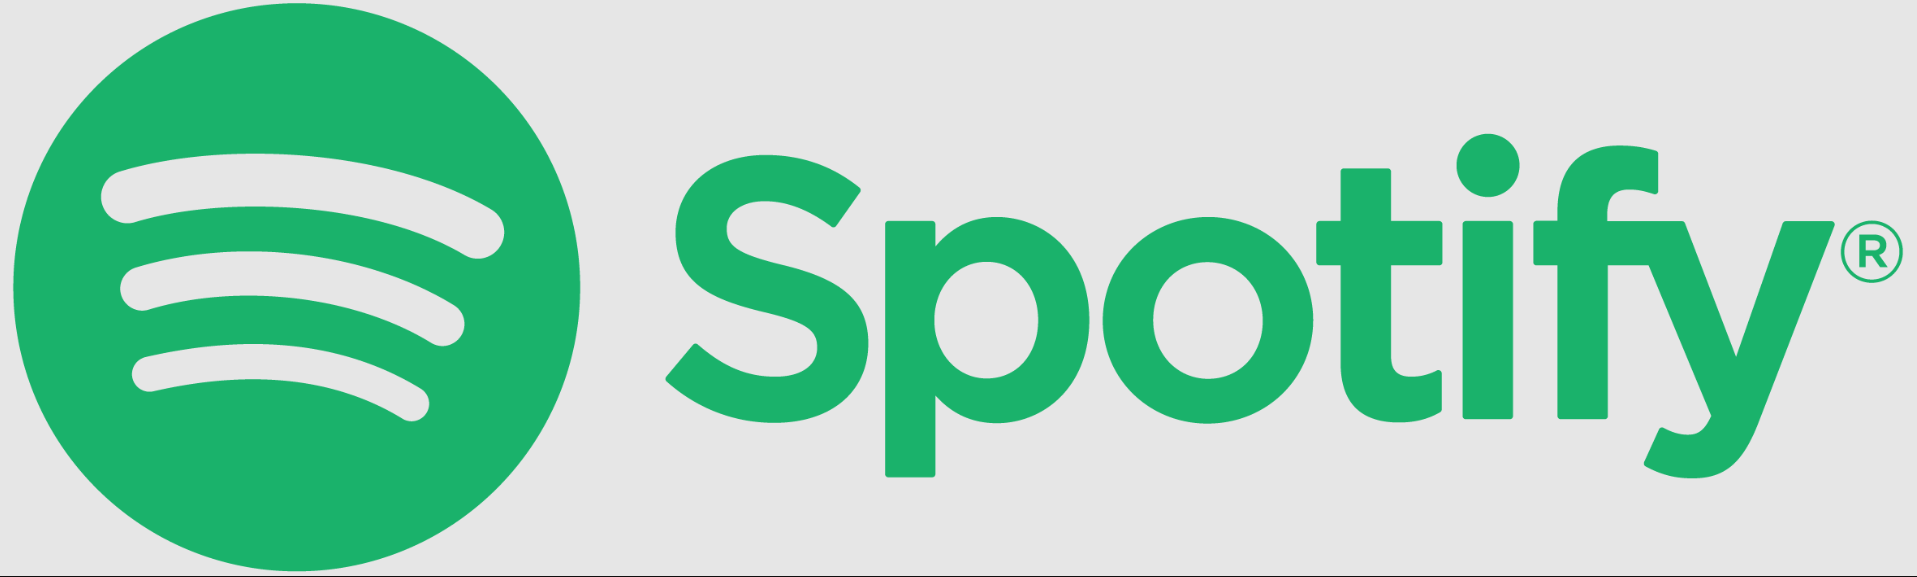

### step 1:  Importing libraries

##### Install the requried libraries :

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble  import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Step 2 : Loading the data

### Loading the data we need to import the pandas library by pandas we can read the csv file and convert into Dataframe

In [245]:
import pandas as pd

In [246]:
df = pd.read_csv("C:\\Users\\song_data.csv")

In [247]:
print(df)                                        #  converted into dataframe

                        song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.0000

#### Showing the index of the column names by using attribute

In [248]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

#### Shape attribute displays the number of rows and columns

In [249]:
df.shape

(18835, 15)

#### info() method describe the nan values and datatypes and there is no null values in this dataframe
#### isna().sum() also other way to print null values

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [251]:
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

#### describe method show the mean and meadian and five number summary values

In [252]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


### Step 3 : Data preparation

#### head() - print the top 5 values of the dataframe

In [253]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [254]:
df.shape

(18835, 15)

In [255]:
df.nunique()

song_name           13070
song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
instrumentalness     3925
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

#### Filtering the columns

In [256]:
df.song_name.nunique()

13070

##### AS songs name are different it will impact our model if we use song_name columns and can't predict best result and we will drop the song_name  

In [257]:
df.drop("song_name",axis=1,inplace=True)

In [258]:
[[262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474]]

[[262333,
  0.00552,
  0.496,
  0.682,
  2.9e-05,
  8,
  0.0589,
  -4.095,
  1,
  0.0294,
  167.06,
  4,
  0.474]]

In [259]:
print(df)

       song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness 

In [ ]:
df.columns

#### Splitting Independent and dependent varaiable

In [261]:
X =df.iloc[:,1:]

In [262]:
y = df.iloc[:,0]
print(y)

0        73
1        66
2        76
3        74
4        56
         ..
18830    60
18831    60
18832    23
18833    55
18834    60
Name: song_popularity, Length: 18835, dtype: int64


#### Independent values

In [263]:
print(X)

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325          0.000000   
18833            352280      0.945000         0.488   0.326          0.015700   
18834            193533      0.911000         0.640   0.381          0.000254   

       key  liveness  loudn

### Dependent values

In [264]:
print(y)

0        73
1        66
2        76
3        74
4        56
         ..
18830    60
18831    60
18832    23
18833    55
18834    60
Name: song_popularity, Length: 18835, dtype: int64


### Model 1 : Selecting features using sklearn get features

In [265]:
from sklearn.ensemble  import ExtraTreesRegressor

In [266]:
model= ExtraTreesRegressor()

In [267]:
model.fit(X,y)

ExtraTreesRegressor()

In [268]:
model.feature_importances_

array([0.08071007, 0.08974853, 0.09243115, 0.08904989, 0.08982664,
       0.07570618, 0.0804332 , 0.09275659, 0.03313331, 0.07906017,
       0.08356053, 0.0165166 , 0.09706713])

In [269]:
X.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

In [270]:
X = X[['song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','tempo','audio_valence']]

In [271]:
print(X)

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325          0.000000   
18833            352280      0.945000         0.488   0.326          0.015700   
18834            193533      0.911000         0.640   0.381          0.000254   

       liveness  loudness  

### Model 2: Selecting Features using SelectKBest

In [272]:
from sklearn.feature_selection import SelectKBest

In [273]:
from sklearn.feature_selection import f_regression

In [274]:
model = SelectKBest(f_regression,k=6)

In [275]:
model.fit(X,y)

SelectKBest(k=6, score_func=<function f_regression at 0x0000021958F87A60>)

In [276]:
X.columns[model.fit(X,y).get_support()]

Index(['acousticness', 'danceability', 'instrumentalness', 'liveness',
       'loudness', 'audio_valence'],
      dtype='object')

#### Step 4: Spliting train and test datasets

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [279]:
print(X_train)

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
1529             258000        0.6630         0.485   0.307          0.000041   
2682             150640        0.4860         0.551   0.293          0.000273   
15566            194049        0.1240         0.702   0.715          0.000000   
12032            190348        0.8020         0.737   0.408          0.000000   
9520             215563        0.8240         0.629   0.208          0.000004   
...                 ...           ...           ...     ...               ...   
1075             241600        0.3680         0.540   0.677          0.000000   
17175            173600        0.0651         0.797   0.844          0.000000   
13190            223500        0.0102         0.625   0.819          0.000135   
12772            165407        0.1880         0.656   0.695          0.000102   
3907             165186        0.4840         0.612   0.402          0.000084   

       liveness  loudness  

In [280]:
X_train.shape

(13184, 9)

In [ ]:
 [[193360,0.0325,0.869,0.660,0.000126,0.0651,-6.231,134.525,0.782]]

In [281]:
print(X_test)

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
6068             193360        0.0325         0.869   0.660          0.000126   
717              207400        0.1290         0.673   0.720          0.013300   
10735             84979        0.4310         0.642   0.712          0.037700   
1965             161560        0.7470         0.529   0.806          0.000110   
2247             250986        0.1270         0.500   0.748          0.000000   
...                 ...           ...           ...     ...               ...   
8022             236904        0.0184         0.831   0.812          0.000000   
775              158640        0.0600         0.769   0.867          0.000562   
15623            206718        0.0161         0.762   0.977          0.000011   
4214             153000        0.8040         0.185   0.430          0.000004   
6083             223840        0.7120         0.832   0.387          0.002350   

       liveness  loudness  

In [282]:
print(y_train)

1529     54
2682     70
15566    66
12032     7
9520     72
         ..
1075     55
17175    83
13190    49
12772    54
3907     39
Name: song_popularity, Length: 13184, dtype: int64


In [283]:
print(y_test)

6068      3
717      68
10735    47
1965     15
2247     79
         ..
8022     61
775      47
15623    33
4214     53
6083     40
Name: song_popularity, Length: 5651, dtype: int64


### Creating a model for predicition the model used is RandomForestRegressor

### Step5: Model Creation

In [284]:
from sklearn.ensemble import RandomForestRegressor

In [285]:
rf_model = RandomForestRegressor()

In [286]:
rf_model.fit(X,y)

RandomForestRegressor()

### Hyperparmeteric tuning with RandomizedSearchCV

In [287]:
from sklearn.model_selection  import RandomizedSearchCV

In [288]:
import numpy as np

#### number of tress in random forest

In [289]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=12)]

In [290]:
print(n_estimators)

[100, 181, 263, 345, 427, 509, 590, 672, 754, 836, 918, 1000]


#### number of features condiser in each split

In [291]:
max_feature=['auto','sqrt']

#### maximum number of level in tree

In [292]:
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
max_depth

[5, 10, 15, 20, 25, 30]

### Minimum number samples required to split a node

In [293]:
min_sample_split=[10,20,30]

#### Minimum no of samples required to split a each leaf node

In [294]:
min_sample_leaf=[1,2,5]

In [295]:
hyperparameter_tune = {
    "n_estimators": n_estimators,
    "max_features": max_feature,
    "max_depth": max_depth,
    "min_samples_split": min_sample_split,
    "min_samples_leaf": min_sample_leaf
}

In [296]:
print(hyperparameter_grid)

{'n_estimators': [100, 181, 263, 345, 427, 509, 590, 672, 754, 836, 918, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [10, 20, 30], 'min_samples_leaf': [1, 2, 5]}


### scoring is loss function,no of iteration is 5, cross_validation=5,output(i.e., epoches)=2,random_state refers to fixing the data 

In [297]:
model = RandomizedSearchCV(estimator=rf_model, param_distributions=hyperparameter_tune,
                          scoring='neg_mean_squared_error', n_iter=5, cv=5, verbose=2,
                          random_state=8)

In [298]:
import warnings
warnings.filterwarnings("ignore")

### Step 6 : Traning the model

In [299]:
model.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=672; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=672; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=672; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=672; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=672; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=181; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=181; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=8, scoring='neg_mean_squared_error', verbose=2)

In [303]:
model.best_params_

{'n_estimators': 263,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

### Step 7 : Model prediction

In [304]:
y_predict=model.predict(X_test)
print(y_predict)

[49.20939583 47.12733408 44.11114701 ... 47.09162693 38.17189713
 38.94188671]


#### Predict the value by giving data of 9 inputs

In [312]:
model.predict( [[203360,0.03525,0.469,0.360,0.000026,0.0951,-7.231,132.525,0.482]])

array([50.21692695])

In [313]:
model.predict( [[193360,0.0325,0.869,0.660,0.000126,0.0651,-6.231,134.525,0.782]])

array([49.20939583])

In [311]:
y_predict[0]

49.209395831472065

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Visualization  :  Uniformally distributed graph and data is trained in better way

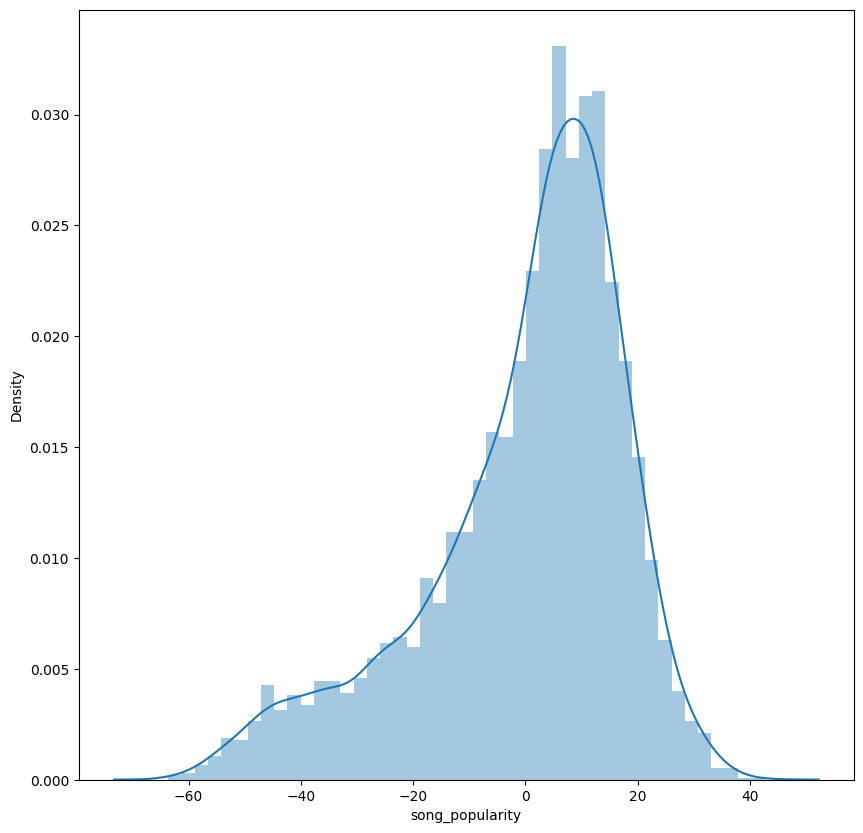

In [320]:
plt.figure(figsize=(10,10))
sns.distplot(y_test - y_predict)
plt.show()

In [321]:
### tuning the values to get better more results to view in scatter plot

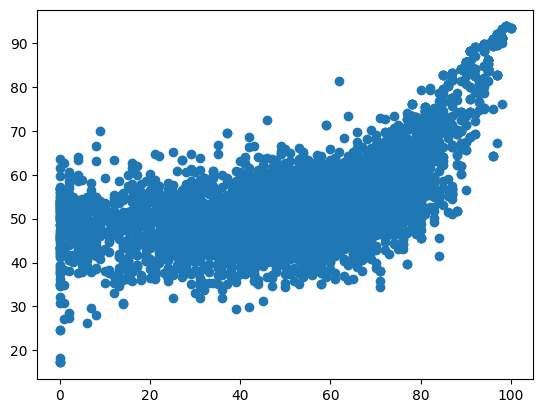

In [322]:
plt.scatter(y_test,y_predict)

### Metrics values

#### The values of MSE and MAE is high 

In [327]:
from sklearn import metrics

In [324]:
print("MAE:",metrics.mean_absolute_error(y_predict,y_test))
print("MSE:",metrics.mean_squared_error(y_predict,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_predict,y_test)))

MAE: 14.059533976039262
MSE: 327.7737531766926
RMSE: 18.10452300329099
